In [1]:
from cvxopt.solvers import qp
from cvxopt.base import matrix
from itertools import product
import numpy , pylab , random , math

In [2]:
def linear_kernel(x,y):
    return sum([x_i*y_i for x_i,y_i in zip(x,y)])+1

In [3]:
#x = [1,2,3]
#y = x
#print(linear_kernel(x,y))
#print([p for p in product(x,y)])

In [4]:
def P_matrix(data, kernel):
    m = numpy.zeros(shape=(len(data),len(data)))
    for i,j in product(range(len(data)),repeat=2):
        m[i,j] = data[i][len(data[i])-1]*data[j][len(data[j])-1]*kernel(data[i][:len(data[i])-1],data[j][:len(data[j])-1])
    return m

In [5]:
data = [(1,2,1),(0,2,1),(2,1,-1)]
print(P_matrix(data,linear_kernel))

[[ 6.  5. -5.]
 [ 5.  5. -3.]
 [-5. -3.  6.]]


In [6]:
def q_vector(size):
    return numpy.array([[-1.0]*size]).T

def h_vector(size):
    return numpy.zeros(shape=(1,size)).T

def G_matrix(size):
    G = numpy.zeros(shape=(size,size))
    for i in range(size):
        G[i,i] = -1
    return G

In [7]:
print(q_vector(5))
print(h_vector(5))
print(G_matrix(5))

[[-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]]
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
[[-1.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.]
 [ 0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0. -1.]]


In [8]:
def calc_alpha(data,kernel,threshold):
    size = len(data)
    P = matrix(P_matrix(data,kernel))
    q = matrix(q_vector(size))
    G = matrix(G_matrix(size))
    h = matrix(h_vector(size))
    return [[data[i],a] for i,a in enumerate(list(qp(P,q,G,h)['x'])) if a>threshold]

In [27]:
def indicator(new_data,kernel,alpha):
    s = sum([alpha[i][1]*alpha[i][0][len(alpha[i][0])-1]*kernel(new_data,alpha[i][0][:len(alpha[i][0])-1]) for i in range(len(alpha))])
    return s
    #return numpy.sign(s)

In [31]:
# Uncomment t h e l i n e bel ow t o g e n e r a t e
# t h e same d a t a s e t ove r and ove r ag a in .
numpy.random.seed(100)
classA = [(random.normalvariate(-1.5 , 1),
random.normalvariate(0.5, 1) ,
1.0)
for i in range (5)] + \
[ (random.normalvariate( 1.5, 1) ,
random.normalvariate(0.5, 1) ,
1.0)
for i in range (5)]
classB = [ (random.normalvariate(0.0, 0.5) ,
random.normalvariate(-0.5, 0.5) ,
-1.0)
for i in range (10) ]
data = classA + classB
random.shuffle(data)

In [37]:
pylab.clf()
pylab.hold(True)
pylab.plot([p[0] for p in classA] ,
[p[1] for p in classA] ,
'bo')
pylab.plot([p[0] for p in classB] ,
[p[1] for p in classB] ,
'ro')


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
/usr/local/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/usr/local/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


In [12]:
print(calc_alpha(data,linear_kernel,10**-5))

     pcost       dcost       gap    pres   dres
 0: -1.3315e+01 -3.2945e+01  7e+01  6e+00  2e+00
 1: -5.9780e+01 -8.2466e+01  3e+01  3e+00  1e+00
 2: -2.6047e+02 -2.9304e+02  3e+01  3e+00  1e+00
 3: -1.0165e+03 -1.1037e+03  9e+01  3e+00  1e+00
 4: -5.2977e+03 -5.6013e+03  3e+02  3e+00  1e+00
 5: -5.7029e+04 -5.8565e+04  2e+03  3e+00  1e+00
 6: -1.8750e+06 -1.8833e+06  8e+03  2e+00  1e+00
 7: -4.1200e+08 -4.1208e+08  8e+04  2e+00  1e+00
 8: -7.0338e+10 -7.0351e+10  1e+07  2e+00  1e+00
 9: -1.0598e+12 -1.0600e+12  2e+08  2e+00  1e+00
Terminated (singular KKT matrix).
[[(-0.11457267009606195, -0.3078229599947029, -1.0), 50814360951.497765], [(0.7964152314627433, -0.06766133453850276, -1.0), 31804495508.39696], [(0.8471188792244694, -0.2341864078981083, 1.0), 135247969858.93056], [(2.510931798418425, 2.5132001101248354, 1.0), 33175043323.990833], [(-0.5924232291087792, -0.8386116151714154, 1.0), 83684669570.91591], [(-3.2307551567558748, -0.66931147418076, 1.0), 10727830807.160965], [(0.92

In [33]:
alpha = calc_alpha(data,linear_kernel,10**-5)
#indicator(x,linear_kernel,alpha)

     pcost       dcost       gap    pres   dres
 0: -1.6904e+01 -4.5680e+01  3e+01  0e+00  3e+00
 1: -3.2990e+01 -3.4741e+01  2e+00  2e-15  1e+00
 2: -6.6448e+02 -6.6564e+02  1e+00  3e-14  1e+00
 3: -3.7555e+05 -3.7556e+05  8e+00  3e-11  1e+00
 4: -1.5727e+10 -1.5727e+10  2e+04  8e-07  1e+00
Terminated (singular KKT matrix).


     pcost       dcost       gap    pres   dres
 0: -1.6904e+01 -4.5680e+01  3e+01  0e+00  3e+00
 1: -3.2990e+01 -3.4741e+01  2e+00  2e-15  1e+00
 2: -6.6448e+02 -6.6564e+02  1e+00  3e-14  1e+00
 3: -3.7555e+05 -3.7556e+05  8e+00  3e-11  1e+00
 4: -1.5727e+10 -1.5727e+10  2e+04  8e-07  1e+00
Terminated (singular KKT matrix).


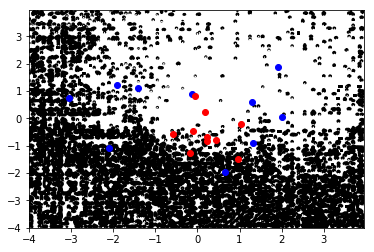

In [38]:
alpha = calc_alpha(data,linear_kernel,10**-5)
xrange=numpy.arange(-4, 4, 0.05)
yrange=numpy.arange(-4, 4, 0.05)
grid=matrix([[indicator((x, y),linear_kernel,alpha) for y in yrange] for x in xrange])
pylab.contour(xrange, yrange, grid,
(-1.0 ,0.0 , 1.0) ,
colors=('red','black','blue') ,
linewidths=(1,3,1))
pylab.show()